In [23]:
# 4.4
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from cobertura import abrangencia
import csv

csvPerfilComparecimentoAbstencao2020 = './dados/perfil_comparecimento_abstencao_2020.csv'
dataPerfilComparecimentoAbstencao2020 = pd.read_csv(csvPerfilComparecimentoAbstencao2020, sep= ';', encoding='ISO-8859-1')


23.532322482592868
0.0
26.270840143837855
0.0
27.724792966756937
0.0
15.270164447924824
0.0
16.185726160788505
0.0
27.07753732452694
0.0
20.329051160694164
0.0
27.6328193191737
0.0
20.70384852850381
0.0
18.04830917874396
0.0
25.336074894465472
0.0
23.238031914893618
0.0
26.683808299407186
0.0
26.960040465351543
0.0
19.175278829428017
0.0
19.51391059706158
0.0
21.078662270372114
0.0
16.859367626238793
0.0
26.225370460837
0.0
26.865815234384396
0.0
18.864842792976724
0.0
29.31588132635253
31.576352530541012
Cidade TAUBATÉ teve eleição de 2º turno
26.44191437142078
0.0
19.976028765481423
0.0
12.358825427557276
0.0
26.64601972929571
0.0
27.254649666627675
0.0
18.357096565132856
0.0
17.737974866387404
0.0
17.95351322468608
0.0
18.67572156196944
0.0
27.316177216731273
0.0
22.653745001260944
0.0
24.4795833529421
0.0
30.288395387875287
0.0
32.854328720072736
0.0
21.34918583613337
0.0
23.158401540683677
0.0
24.957716701902747
0.0
27.966507802357697
0.0
22.583174638736416
0.0
28.755335365853657


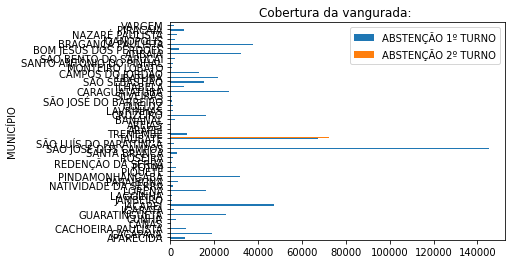

In [106]:
def createQuery(list):
        count = 0
        query = ""

        for abr_code in list:
                query += 'CD_MUNICIPIO == ' + str(abr_code["codigo"])
                count += 1
                if count < len(list):
                        query += ' or '
        return query

query = createQuery(abrangencia)
dfAbstencaoEleicao2020 = pd.DataFrame(data = dataPerfilComparecimentoAbstencao2020.query(query), columns=['CD_MUNICIPIO', 'NR_TURNO', 'QT_ABSTENCAO', 'QT_COMPARECIMENTO'])

def generateChart(list, label, filename, chart): 
        listResults = []
        for abr_code in list:
                filtroCidade = pd.DataFrame(data = dfAbstencaoEleicao2020.query('CD_MUNICIPIO == ' + str(abr_code["codigo"])))
                filtroTurno1 = filtroCidade.query('NR_TURNO == 1')
                filtroTurno2 = filtroCidade.query('NR_TURNO == 2')

                comp_turno_1 = filtroTurno1.QT_COMPARECIMENTO.sum()
                abs_turno_1 = filtroTurno1.QT_ABSTENCAO.sum()

                totalEleitores = comp_turno_1 + abs_turno_1

                comp_turno_2 = filtroTurno2.QT_COMPARECIMENTO.sum()
                abs_turno_2 = filtroTurno2.QT_ABSTENCAO.sum()

                perc_abs_1_turno = (abs_turno_1 * 100) / totalEleitores
                perc_abs_2_turno = (abs_turno_2 * 100) / totalEleitores

                print(perc_abs_1_turno)
                print(perc_abs_2_turno)

                # dft = pd.DataFrame({"REGIÃO":abr_code["regiao"], "MUNICÍPIO":abr_code["cidade"], "COMPARECIMENTO 1º TURNO":[comp_turno_1], "ABSTENÇÃO 1º TURNO": [abs_turno_1], "COMPARECIMENTO 2º TURNO":[comp_turno_2], "ABSTENÇÃO 2º TURNO": [abs_turno_2]})
                if(comp_turno_2 > 0) : print('Cidade ' + abr_code["cidade"] + ' teve eleição de 2º turno')
                dft = pd.DataFrame({"REGIÃO":abr_code["regiao"], "MUNICÍPIO":abr_code["cidade"], "ABSTENÇÃO 1º TURNO": [abs_turno_1], "ABSTENÇÃO 2º TURNO": [abs_turno_2]})
                listResults.append(dft)

        dfm = pd.concat(listResults)
        if(chart == "pie"):
        #     print("teste")
                cities=[list[0]['cidade']]

                fig = go.Figure(data=[
                        go.Bar(name='1º Turno', x=cities, y=[abs_turno_1]),
                        go.Bar(name='2º Turno', x=cities, y=[abs_turno_2]),
                        go.Bar(name='Total', x=cities, y=[(totalEleitores - abs_turno_1 - abs_turno_2)], hovertext=['Total: ' + str(totalEleitores)])
                ])
                # Change the bar mode
                fig.update_layout(barmode='stack')
                fig.show()
        else:
            dfm.plot(kind="barh", x="MUNICÍPIO", title=label)
        dfm.to_csv('export/'+ filename +'.csv', encoding='utf-8')

generateChart(abrangencia, 'Cobertura da vangurada: ', "Abstencao_cobertura", "bar")

Cidade: APARECIDA
Total Eleitores: 28293 | Percentual Abstenção 1º turno: 23.532322482592868 | Percentual Abstenção 2º turno: Ñ
Cidade: CAÇAPAVA
Total Eleitores: 73416 | Percentual Abstenção 1º turno: 26.270840143837855 | Percentual Abstenção 2º turno: Ñ
Cidade: CACHOEIRA PAULISTA
Total Eleitores: 25479 | Percentual Abstenção 1º turno: 27.724792966756937 | Percentual Abstenção 2º turno: Ñ
Cidade: CANAS
Total Eleitores: 3831 | Percentual Abstenção 1º turno: 15.270164447924824 | Percentual Abstenção 2º turno: Ñ
Cidade: CUNHA
Total Eleitores: 16842 | Percentual Abstenção 1º turno: 16.185726160788505 | Percentual Abstenção 2º turno: Ñ
Cidade: GUARATINGUETÁ
Total Eleitores: 94174 | Percentual Abstenção 1º turno: 27.07753732452694 | Percentual Abstenção 2º turno: Ñ
Cidade: IGARATÁ
Total Eleitores: 8874 | Percentual Abstenção 1º turno: 20.329051160694164 | Percentual Abstenção 2º turno: Ñ
Cidade: JACAREÍ
Total Eleitores: 171850 | Percentual Abstenção 1º turno: 27.6328193191737 | Percentual Ab

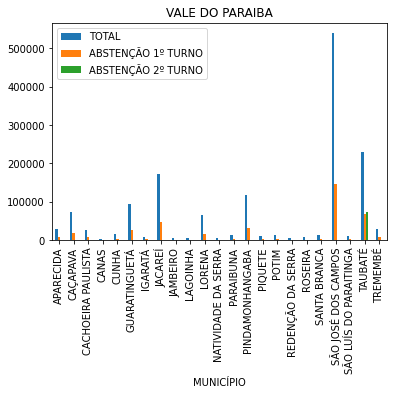

In [25]:
regiao = "VALE DO PARAIBA"
listaCidades = []

for abr_item in abrangencia:
    if abr_item['regiao'] == regiao:
        listaCidades.append(abr_item)

query = createQuery(listaCidades)
generateChart(listaCidades, regiao, "Abstencao_" + regiao.replace(" ", "_"), "bar")

In [107]:
cidade = "SÃO JOSÉ DOS CAMPOS"
listaCidades = []

for abr_item in abrangencia:
    if abr_item['cidade'] == cidade:
        listaCidades.append(abr_item)

query = createQuery(listaCidades)
generateChart(listaCidades, cidade, "Abstencao_" + cidade.replace(" ", "_"), "pie")

26.865815234384396
0.0
